In [187]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold


from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [188]:
df = pd.read_csv('df_for_ML.csv', index_col='date')
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,,,,
1993-08-08,24,116,8,14,1,1,8,0,85.941860,79.248175,86.538372,85.355233,76.813139,79.659854,77.708759,2
1993-08-08,52,191,35,94,5,0,7,0,71.275510,67.311111,75.413265,75.042857,72.305714,74.660417,73.423810,3
1993-08-15,9,31,52,46,2,1,7,1,78.088710,71.726190,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,179,24,22,8,1,1,7,0,79.368421,86.371622,83.721053,78.356140,86.077027,86.625000,85.312162,2
1993-08-22,6,137,5,70,2,1,7,0,80.500000,69.581395,88.286709,84.138608,70.993878,76.436735,73.813636,3


In [189]:
df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_score', 'away_team_score', 'tournament', 'shoot_out',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score', 'result'],
      dtype='object')

# Scaling and SGDClassifer

In [190]:
X = df.drop(['result'], axis=1)
y = df['result']

## Scaling using StandScaler 
* I don't want "yet" to remove the few outliers 

In [191]:
from sklearn.preprocessing import StandardScaler
import sklearn

Scaller = StandardScaler()
 
# standardization 
X = Scaller.fit_transform(X) 

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [193]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6551, 15), (3227, 15), (6551,), (3227,))

In [194]:
from sklearn.linear_model import SGDClassifier

In [195]:
clf = SGDClassifier(loss="modified_huber", alpha = 0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='modified_huber')

In [196]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.98


C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


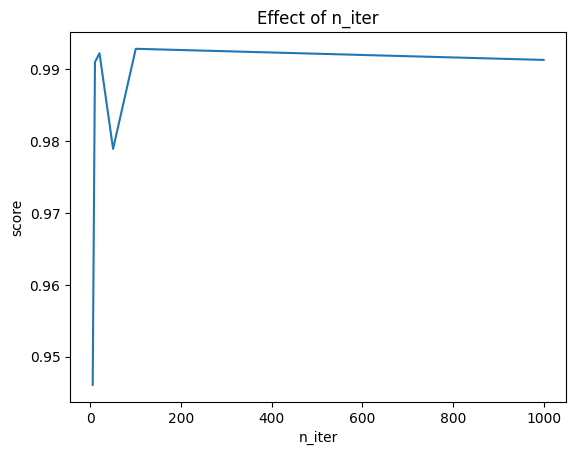

In [197]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="perceptron", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

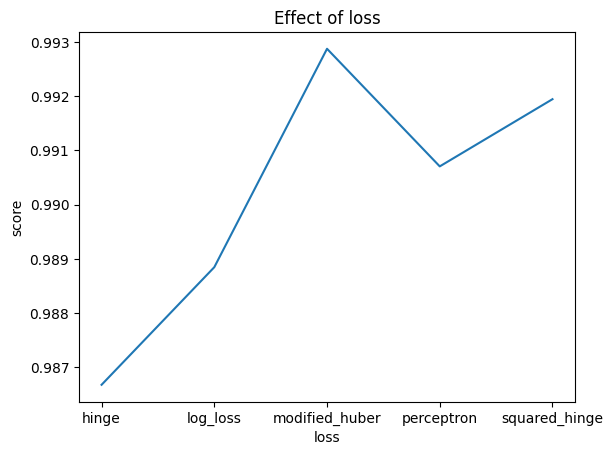

In [198]:
losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  

plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [58]:
params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_)

C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'none'}


In [199]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.99


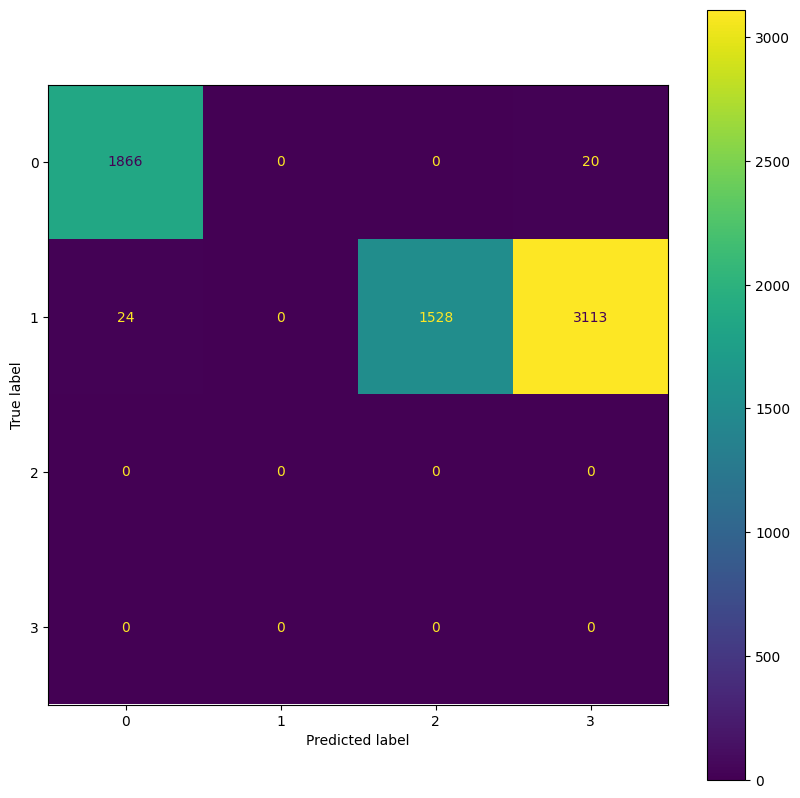

In [200]:
y_predict_train = np.where(grid.predict(X_train)<0.5, 0, 1) 

display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_predict_train, y_train))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

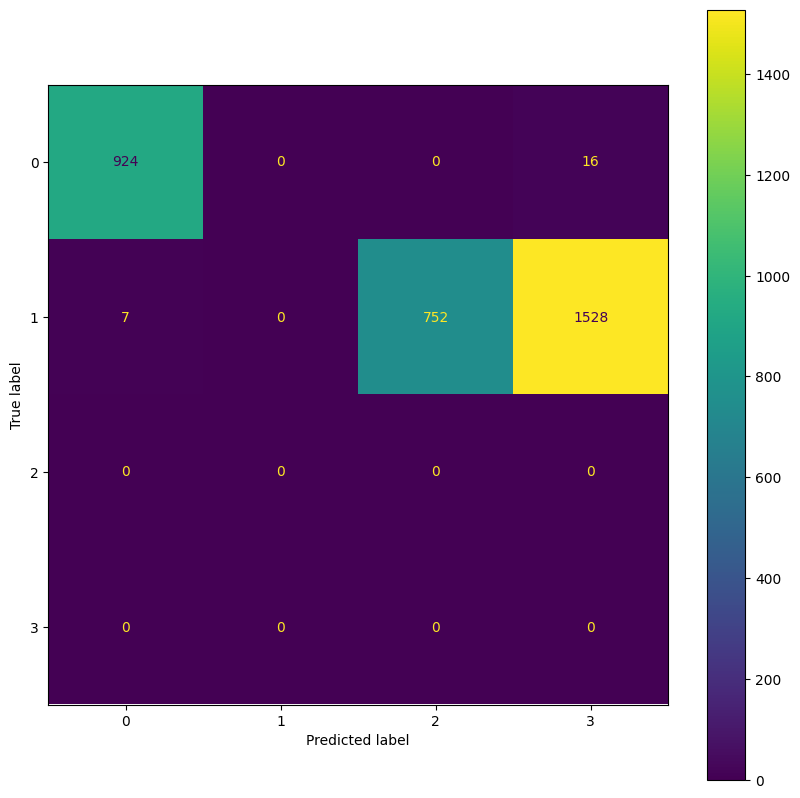

In [201]:
y_pred = np.where(grid.predict(X_test)<0.5, 0,1) 

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

# Random classifer 

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=10, random_state=1, max_features='sqrt')

In [259]:
train = df[df.index < '2022-10-01']
test = df[df.index > '2020-10-01']

#_train, X_test, y_train, y_test = train_test_split(train , test , test_size=0.33, random_state=1, stratify=y)
train.shape,test.shape
                                

((9778, 16), (777, 16))

In [260]:
predictors = ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'tournament']

In [256]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

rf = GridSearchCV(rf, forest_params, cv = 10, scoring='accuracy')

rf.fit(train[predictors], train["result"])

print(clf.best_score_)


KeyboardInterrupt



In [261]:
rf.fit(train[predictors], train["result"])

RandomForestClassifier(min_samples_split=10, n_estimators=400, random_state=1)

In [262]:
preds = rf.predict(test[predictors])

In [263]:
error = accuracy_score(test["result"], preds)
error

0.9060489060489061

In [264]:
combined = pd.DataFrame(dict(actual=test["result"], predicted=preds))

In [265]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,2,3
actual,,,
0,181,3,18
2,10,137,38
3,2,2,386


# New search with rolling method on the variables "work in process"

In [132]:
df = pd.read_csv('df_for_ML_countries_not_numeric.csv')
df.head()

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
0,1993-08-08,Brazil,Mexico,8,14,1,1,8,0,85.941860,79.248175,86.538372,85.355233,76.813139,79.659854,77.708759,2
1,1993-08-08,Ecuador,Venezuela,35,94,5,0,7,0,71.275510,67.311111,75.413265,75.042857,72.305714,74.660417,73.423810,3
2,1993-08-15,Australia,Canada,52,46,2,1,7,1,78.088710,71.726190,74.718548,74.060484,68.810714,71.543210,72.527381,3
3,1993-08-15,Uruguay,Brazil,22,8,1,1,7,0,79.368421,86.371622,83.721053,78.356140,86.077027,86.625000,85.312162,2
4,1993-08-22,Argentina,Peru,5,70,2,1,7,0,80.500000,69.581395,88.286709,84.138608,70.993878,76.436735,73.813636,3


In [161]:
grouped_matches = df.groupby("home_team")

In [162]:
group = grouped_matches.get_group("France").sort_values("date")

In [163]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [164]:
cols = ['home_team_score', 'away_team_score',
       'tournament', 'shoot_out', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,...,away_team_score_rolling,tournament_rolling,shoot_out_rolling,home_team_goalkeeper_score_rolling,away_team_goalkeeper_score_rolling,home_team_mean_offense_score_rolling,home_team_mean_midfield_score_rolling,away_team_mean_defense_score_rolling,away_team_mean_offense_score_rolling,away_team_mean_midfield_score_rolling
186,1994-08-17,France,Czech Republic,16,44,2,2,8,0,86.842365,...,2.000000,7.333333,0.0,86.842365,73.612589,85.621182,86.123153,70.395566,75.082545,75.234429
201,1994-10-08,France,Romania,20,7,0,0,10,0,86.842365,...,1.666667,7.666667,0.0,86.842365,78.671413,85.621182,86.123153,73.991644,76.030094,77.177707
269,1995-04-26,France,Slovakia,18,38,4,0,10,0,86.842365,...,1.000000,8.666667,0.0,86.842365,79.443152,85.621182,86.123153,76.313093,77.133137,77.693431
5521,1995-08-16,France,Poland,18,32,1,1,10,0,86.842365,...,0.666667,9.333333,0.0,86.842365,77.885747,85.621182,86.123153,76.277617,75.129216,76.218167
326,1995-08-16,France,Poland,18,32,1,1,10,0,86.842365,...,0.333333,10.000000,0.0,86.842365,76.947436,85.621182,86.123153,75.473590,76.058974,75.443718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,2022-03-29,France,South Africa,3,68,5,0,8,0,87.000000,...,0.333333,7.333333,0.0,87.000000,73.310000,88.300000,86.800000,73.810000,75.176667,75.810000
5209,2022-06-03,France,Denmark,3,11,1,2,11,0,87.000000,...,0.333333,7.666667,0.0,87.000000,69.310000,88.300000,86.800000,73.743333,74.643333,75.310000
9749,2022-06-03,France,Denmark,3,11,1,2,11,0,87.000000,...,1.000000,9.000000,0.0,87.000000,73.000000,88.300000,86.800000,75.833333,75.900000,77.400000
5242,2022-06-13,France,Croatia,3,16,0,1,11,0,87.000000,...,1.333333,10.000000,0.0,87.000000,80.333333,88.300000,86.800000,76.733333,75.366667,77.466667


In [165]:
matches_rolling = df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [166]:
matches_rolling = matches_rolling.droplevel('home_team')


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,...,away_team_score_rolling,tournament_rolling,shoot_out_rolling,home_team_goalkeeper_score_rolling,away_team_goalkeeper_score_rolling,home_team_mean_offense_score_rolling,home_team_mean_midfield_score_rolling,away_team_mean_defense_score_rolling,away_team_mean_offense_score_rolling,away_team_mean_midfield_score_rolling
5548,1995-11-15,Albania,Wales,89,59,1,1,10,0,70.80,...,2.666667,8.000000,0.0,70.80,85.649918,68.771429,71.600000,82.940097,82.298987,83.938933
5669,1996-10-09,Albania,Portugal,111,14,0,3,7,0,70.80,...,2.666667,9.000000,0.0,70.80,83.649862,68.771429,71.600000,81.637693,81.240845,83.639409
5749,1997-04-02,Albania,Germany,118,2,2,3,7,0,70.80,...,2.000000,9.000000,0.0,70.80,81.385709,68.771429,71.600000,80.734895,80.956263,82.510681
6316,2001-03-28,Albania,England,75,16,1,3,7,0,70.80,...,2.333333,8.000000,0.0,70.80,81.385709,68.771429,71.600000,80.734895,80.956263,82.510681
6350,2001-06-06,Albania,Germany,79,9,0,2,7,0,70.80,...,3.000000,7.000000,0.0,70.80,84.589787,68.771429,71.600000,84.028930,84.448712,84.641682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,2007-03-25,Zimbabwe,Morocco,91,44,1,1,2,0,73.93,...,2.000000,3.333333,0.0,73.93,73.828866,69.725000,57.050000,75.991423,77.418735,77.354334
7800,2010-06-02,Zimbabwe,Brazil,110,1,0,3,8,0,73.93,...,1.666667,1.666667,0.0,73.93,73.124031,69.725000,56.058333,74.742568,77.088964,75.747973
8459,2014-01-12,Zimbabwe,Morocco,107,73,0,0,3,0,73.93,...,2.000000,3.666667,0.0,73.93,80.000000,70.250000,56.566667,78.433333,80.666667,76.966667
8949,2017-01-23,Zimbabwe,Tunisia,103,36,2,4,1,0,73.93,...,1.333333,4.333333,0.0,73.93,78.333333,70.008333,59.900000,77.533333,79.000000,77.500000


In [167]:
matches_rolling.index = range(matches_rolling.shape[0])

In [170]:
matches_rolling.loc[(matches_rolling['home_team'] == 'Qatar' )]

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,...,away_team_score_rolling,tournament_rolling,shoot_out_rolling,home_team_goalkeeper_score_rolling,away_team_goalkeeper_score_rolling,home_team_mean_offense_score_rolling,home_team_mean_midfield_score_rolling,away_team_mean_defense_score_rolling,away_team_mean_offense_score_rolling,away_team_mean_midfield_score_rolling
6563,1994-09-16,Qatar,Yemen,71,109,2,0,8,0,73.93,...,0.666667,8.000000,0.0,73.93,77.711111,73.93,73.93,73.803750,68.858333,73.472500
6564,1996-02-18,Qatar,Ecuador,84,57,1,1,8,0,73.93,...,0.666667,8.000000,0.0,73.93,75.854444,73.93,73.93,73.866875,69.522500,73.701250
6565,1996-02-18,Qatar,Ecuador,84,57,1,1,8,0,73.93,...,1.000000,8.000000,0.0,73.93,73.219179,73.93,73.93,72.880626,70.650097,74.276522
6566,1996-02-25,Qatar,Ecuador,85,54,1,2,8,0,73.93,...,0.666667,8.000000,0.0,73.93,72.372802,73.93,73.93,71.831253,74.856860,74.623043
6567,1996-02-25,Qatar,Ecuador,85,54,1,2,8,0,73.93,...,1.333333,8.000000,0.0,73.93,71.594203,73.93,73.93,70.781879,75.320290,74.969565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761,2021-09-01,Qatar,Serbia,42,29,0,4,8,0,73.93,...,1.333333,7.666667,0.0,73.93,71.711111,73.93,73.93,74.553333,72.310000,73.410000
6762,2021-09-04,Qatar,Portugal,42,8,1,3,8,0,73.93,...,2.666667,8.000000,0.0,73.93,73.666667,73.93,73.93,75.176667,78.176667,76.033333
6763,2021-09-04,Qatar,Portugal,42,8,1,3,8,0,73.93,...,3.666667,8.000000,0.0,73.93,80.666667,73.93,73.93,78.933333,82.200000,82.700000
6764,2022-03-26,Qatar,Bulgaria,52,71,2,1,8,0,73.93,...,3.333333,8.000000,0.0,73.93,81.333333,73.93,73.93,82.066667,84.100000,83.600000


In [171]:
def make_predictions(data, predictors):
    train = data[data.index < '2022-10-01']
    test = data[data.index < '2022-10-01']
    rf.fit(train[predictors], train["result"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["result"], predicted=preds), index=test.index)
    error = precision_score(test["result"], preds)
    return combined, error

In [172]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

TypeError: Invalid comparison between dtype=int64 and str